摘自： https://zhuanlan.zhihu.com/p/441197063

## 机器学习领域的“距离”


在机器学习领域，说到距离，一般描述的是两种分布之间的距离。大家耳熟能详的可能是KL散度，JS散度。但是他们都有自己的缺陷：

（1）KL散度：不对称性。即如果用p“指导”q，则公示如下，但是将p和q的位置对调，距离竟然会改变。

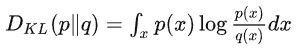

（2）JS散度：通过求KL散度的“平均距离”，解决了KL散度的不对称问题，如下所示。

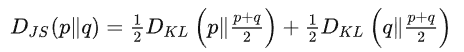

上述两种距离有一个“通病”，那就是当p和q之间的“重叠区域”很小时，KL散度和JS散度无法有效的评估两个分布直接的距离。举个例子，如下图[5]所示（红色和蓝色两个单峰分布）。在这种情况下，无论怎么左右挪动Q，只要Q与P不重叠，那么KL散度和JS散度算出来的距离都是不变的。

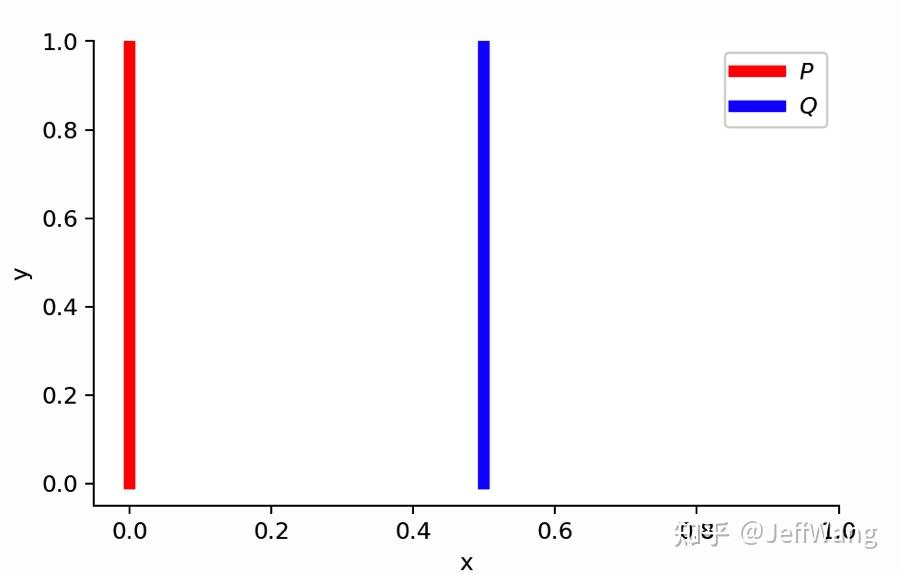



## Wasserstein距离


觉告诉我们，当Q向左挪动，靠近P的时候，这两个分布的距离应该会减少，但是KL散度和JS散度无法解决这个问题。因此Wasserstein距离就被提出来了。

Wasserstein距离又称挖土机距离（EMD：Earth Mover's distance），形象的表达了该距离的特性：如何将Q花最少的力气“挪动”到P。

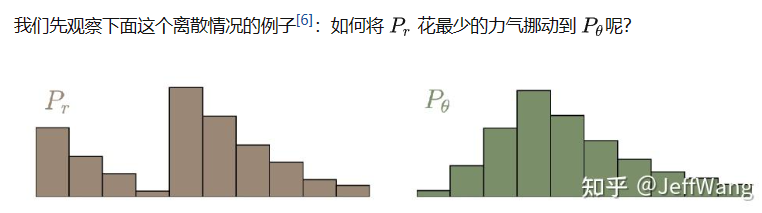

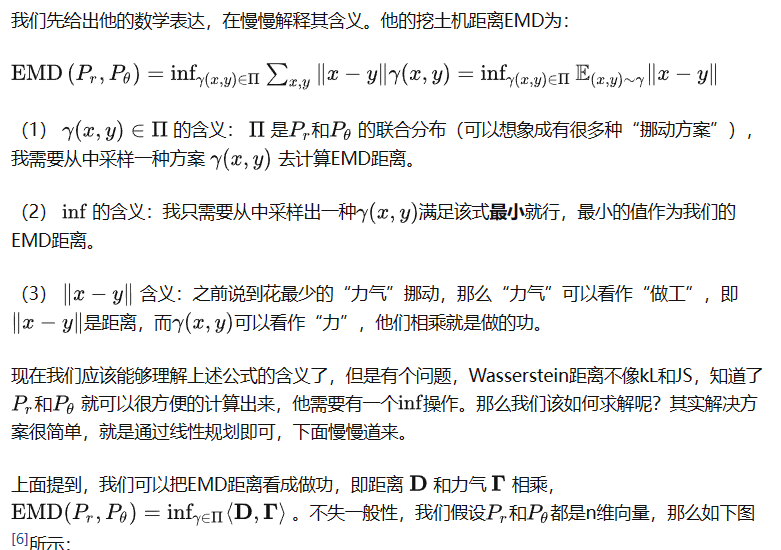

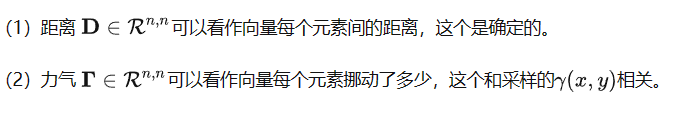

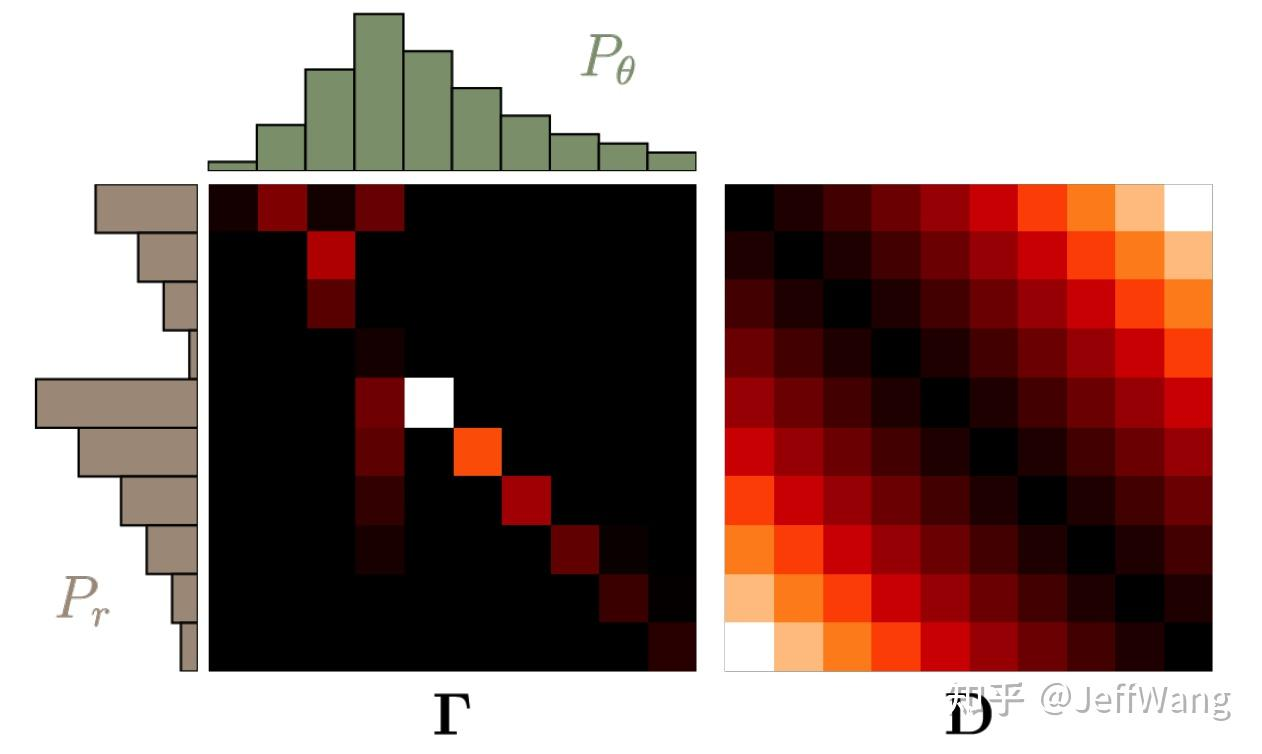


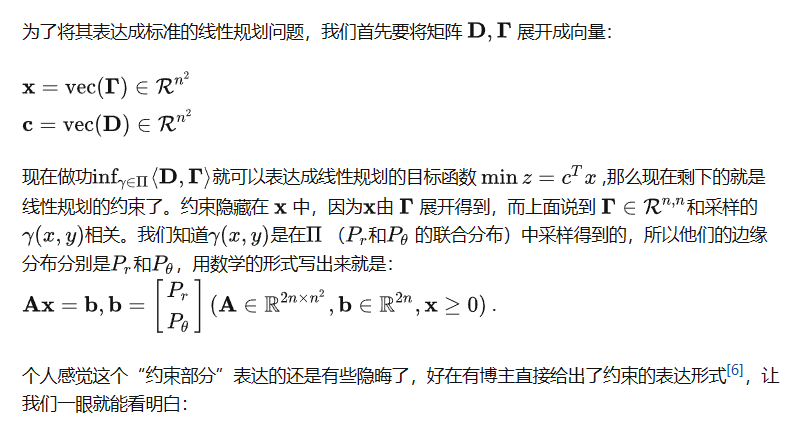


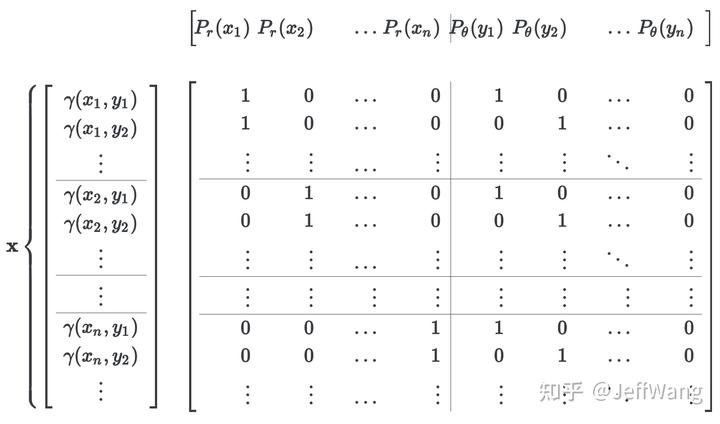

有了目标条件，也有了线性约束，我们直接利用先用的线性规划工具就可以直接求解得到EMD距离

在现有的基础上加上了：Kantorovich-Rubinstein Duality以及L1 Lipschitz contunuity约束，得到了一种更优雅的表达Wasserstein距离的公式

文献支持：


^Revisiting Stereo Depth Estimation From a Sequence-to-Sequence Perspective with Transformers http://arxiv.org/abs/2011.02910


^SuperGlue: Learning Feature Matching with Graph Neural Networks https://arxiv.org/abs/1911.11763


^Computational Optimal Transport https://arxiv.org/abs/1803.00567


^abSinkhorn Distances: Lightspeed Computation of Optimal Transport https://proceedings.neurips.cc/paper/2013/file/af21d0c97db2e27e13572cbf59eb343d-Paper.pdf


^From GAN to WGAN https://lilianweng.github.io/lil-log/2017/08/20/from-GAN-to-WGAN.html#wasserstein-gan-wgan


^abcWasserstein GAN and the Kantorovich- Rubinstein Duality https://vincentherrmann.github.io/blog/wasserstein/


^Wasserstein GAN https://arxiv.org/abs/1701.07875

## Sinkhorn算法


Sinkhorn算法用于解决离散分布之间的最优输运问题，通常用于处理概率分布之间的匹配和对齐问题


一种用于解决最优传输问题的迭代算法。 最优传输问题是指在给定两个概率分布 μ 和 ν 的情况下，找到一个最优的转移方案，使得从 μ 到 ν 的转移成本最小。 Sinkhorn算法通过迭代的方式逐步优化转移方案，以达到最优传输的目标。

**Sinkhorn算法的核心思想是通过交替地更新行和列的缩放因子，来逐步逼近最优转移方案**

sinkhorn函数实现了Sinkhorn算法。它接受输入概率分布p和q，以及成本矩阵C和正则化参数epsilon。函数通过迭代更新转移矩阵P，直到收敛或达到最大迭代次数。最后，函数返回计算得到的转移矩阵P



示例用法中，我们定义了两个概率分布p和q，以及成本矩阵C。通过调用sinkhorn函数并传入相应参数，我们可以计算得到最优的转移矩阵P。最后，我们将P打印出来

In [6]:
import numpy as np
import matplotlib.pyplot as plt


source = np.array([0.4, 0.6])
target = np.array([0.3, 0.3, 0.4])
m = source.shape[0]
n =target.shape[0]
source = source.reshape((source.shape[0], 1))
target = target.reshape((target.shape[0], 1))


cost = np.array([[1,1,1],[2,3,4]])
gamma = 0.01
maxiters = 1000
M = np.exp(-cost / gamma)

mu = np.ones((m, 1))
nu = np.ones((n, 1))

thresh = 10 ** (-1)  # stopping criterion
last_mu = np.ones((m, 1)) * -1

for k in range(maxiters):
    mu = np.divide(source, np.dot(M, nu))
    nu = np.divide(target, np.dot(M.T, mu))
    pi = np.dot(
        np.dot(
            np.diag(mu.reshape(-1)),
            M),
        np.diag(nu.reshape(-1))
    )

    sinkhorn_distance = np.sqrt(sum(sum(np.multiply(pi, cost))))
    print(sinkhorn_distance)


print("sinkhorn distance: ", sinkhorn_distance)
print("transport matrix: ", pi)



1.1159993483217387
1.1341106191865606
1.1385009528822676
1.1397015613246688
1.1400404028811455
1.1401368772121165
1.1401644138546578
1.1401722792282114
1.1401745262951106
1.1401751682993129
1.1401753517278674
1.1401754041359269
1.1401754191096498
1.1401754233878556
1.1401754246102003
1.1401754249594416
1.1401754250592246
1.140175425087734
1.1401754250958798
1.140175425098207
1.140175425098872
1.140175425099062
1.1401754250991163
1.1401754250991318
1.140175425099136
1.1401754250991376
1.1401754250991378
1.1401754250991378
1.1401754250991378
1.1401754250991378
1.1401754250991378
1.1401754250991378
1.1401754250991378
1.1401754250991378
1.1401754250991378
1.1401754250991378
1.1401754250991378
1.1401754250991378
1.1401754250991378
1.1401754250991378
1.1401754250991378
1.1401754250991378
1.1401754250991378
1.1401754250991378
1.1401754250991378
1.1401754250991378
1.1401754250991378
1.1401754250991378
1.140175425099138
1.140175425099138
1.140175425099138
1.1401754250991383
1.1401754250991392
1

  1. 输入分布：你有两个离散分布，分别表示为A和B。这些分布可以用概率向量来表示，例如A = [0.1, 0.2, 0.3]和B = [0.4, 0.5, 0.1]，它们分别表示了三个不同元素的概率分布。

  2. 正则化参数：Sinkhorn算法引入了正则化参数epsilon，它是一个正数，用于平衡分布之间的匹配和对齐。epsilon的值越小，匹配越严格，但计算的时间和空间成本也越高。

  3. 计算相似度矩阵：通过计算分布A和B之间元素之间的相似度，得到相似度矩阵K。这通常使用高斯核函数计算，例如K[i][j] = exp(-epsilon * ||A[i] - B[j]||^2)。这个矩阵表示了元素i从分布A到元素j从分布B的转移概率。

  4. 初始化概率向量：初始化两个概率向量u和v，它们分别用于表示从A到B和从B到A的转移概率。通常可以将它们初始化为全1向量。

  5. 迭代优化：Sinkhorn算法开始迭代，每次迭代更新u和v，以使它们更好地匹配相似度矩阵K。更新规则如下：
        计算新的u_new = A / (K @ v)
        计算新的v_new = B / (K.T @ u_new)
        如果u和v收敛（即不再变化），则停止迭代；否则，重复上述步骤。

  最优输运矩阵：一旦迭代结束，你将得到最优的转移矩阵，它表示了如何从分布A到B进行最优的匹配和对齐。这个矩阵的元素表示了从元素i到元素j的概率。

Sinkhorn算法是一种用于处理概率分布匹配和对齐的有效方法，通常用于图像处理、自然语言处理和优化问题中。这个算法的核心思想是通过迭代优化，找到最佳的转移概率，以使两个分布尽可能地接近。

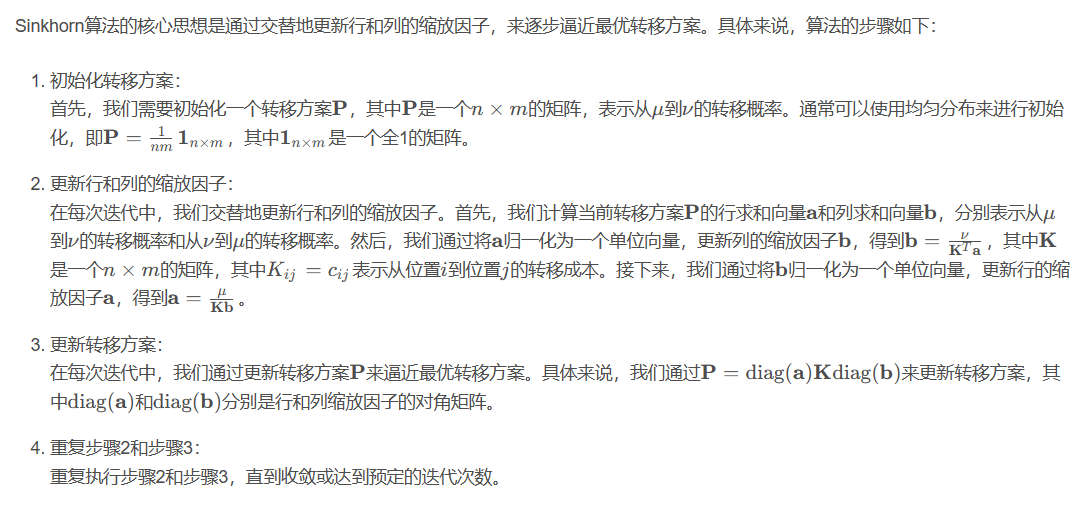

In [7]:
import  numpy as np


def compute_optimal_transport(r, c,M, lam, epsilon=1e-8):
    """
    Computes the optimal transport matrix and Slinkhorn distance using the
    Sinkhorn-Knopp algorithm
    Inputs:
        - M : cost matrix (n x m)  # M 是成本矩阵，大小为 n x m，其中 n 表示源分布的元素数量，m 表示目标分布的元素数量。M[i][j] 表示将元素 i 从源分布传输到元素 j 的成本
        - r : vector of marginals (n, )  # r 是源分布的边际分布，是一个长度为 n 的一维向量。
        - c : vector of marginals (m, )   c 是目标分布的边际分布，是一个长度为 m 的一维向量
        - lam : strength of the entropic regularization  # lam 是正则化参数，用于控制正则化项的强度。
        - epsilon : convergence parameter  # epsilon 是收敛参数，用于判断迭代是否收敛的阈值
    Outputs:
        - P : optimal transport matrix (n x m)
        - dist : Sinkhorn distance
    """
    n, m = M.shape
    P = np.exp(- lam * M) # # 构造指数内核矩阵K
    P /= P.sum() # 归一化 P，将其除以所有元素之和，以确保它是一个概率分布。
    u = np.zeros(n) # 初始化转移矩阵P

    # 在一个循环中，不断更新 u 和 P，直到收敛。循环的终止条件是 u 的最大绝对差值与 P 的每行之和的最大绝对差值都小于 epsilon。
    # 这个过程是Sinkhorn-Knopp算法的核心。
    # normalize this matrix
    while np.max(np.abs(u - P.sum(1))) > epsilon:
        u = P.sum(1) # 在每次迭代中，首先更新 u 为 P 的每行之和。

        # 然后将 P 中的元素按照 r 和 c 的归一化因子进行缩放。这里使用了广播操作以有效地更新 P
        P *= (r / u).reshape((-1, 1)) # 行归r化，注意python中*号含义
        P *= (c / P.sum(0)).reshape((1, -1)) # 列归c化
    return P, np.sum(P * M)


# 示例用法
p = np.array([0.2, 0.3, 0.5])
q = np.array([0.1, 0.4, 0.5])
C = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(compute_optimal_transport(p,q,C,0.1))

(array([[0.02, 0.08, 0.1 ],
       [0.03, 0.12, 0.15],
       [0.05, 0.2 , 0.25]]), 6.300000000000001)


正则化参数 lam 的取值通常取决于具体问题和算法的需求。它控制了正则化项的强度，可以用来平衡两个目标：最小化成本（匹配两个分布的成本）和使得最优输运矩阵稀疏（即控制匹配的稀疏性）。

通常情况下，正则化参数 lam 可以设置为一个较小的正数值，比如0.1或0.01。较小的 lam 值会导致较强的正则化，使得最优输运矩阵更加稀疏，因此在某些情况下可能会更符合实际问题的需求。然而，具体的最佳取值通常需要根据问题的性质和数据的特点进行调整和实验。

如果你不确定要使用哪个 lam 值，可以尝试不同的值，并根据实验结果来选择最适合你的问题的值。通常，选择一个较小的初始值是一个合理的起点，然后根据实验来微调。在实际应用中，对于不同的问题，lam 的最佳取值可能会有所不同。


当涉及到Sinkhorn算法和正则化参数lam时，较小的lam值会导致较强的正则化，从而使得最优输运矩阵更加稀疏的现象可以通过以下方式解释：

  1. 正则化的作用：正则化是一种在优化问题中引入的额外约束或惩罚，以防止解决方案变得过于复杂或过拟合。在Sinkhorn算法中，正则化参数lam控制了正则化项的强度。正则化项有助于调整最优输运矩阵的结构，以更好地满足一些特定的约束或目标。

  2. 稀疏性：在最优输运问题中，最优输运矩阵是一个非负矩阵，表示如何从源分布到目标分布进行匹配和对齐。稀疏性表示矩阵中许多元素为零，即在匹配中存在许多元素之间的零转移概率。

  3. 调整正则化参数lam：较小的lam值会导致较强的正则化，正则化项的影响将更显著。这将鼓励Sinkhorn算法生成更加稀疏的最优输运矩阵，因为正则化将限制非零元素的数量。具体来说，正则化项倾向于将一些转移概率设为零，从而使得最优输运矩阵更加稀疏，以满足问题的约束。

  4. 权衡：选择正则化参数lam的值通常需要权衡两个目标。较小的lam值会增强正则化的影响，使得最优输运矩阵更稀疏，但可能导致成本的增加。较大的lam值可能会减小正则化的影响，使得最优输运矩阵更密集，但可能会导致更高的成本。因此，选择lam的值通常是一个权衡成本和稀疏性的过程，具体取决于问题的性质和优化的目标。

总之，较小的正则化参数lam会强化正则化的作用，使得Sinkhorn算法生成的最优输运矩阵更加稀疏，以满足问题的需求和约束。这有助于平衡成本和匹配稀疏性之间的权衡。
